In [1]:
from utils.mlp import MyDataset, MLP, train, validation

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
torch.manual_seed(999);

# Load non-augmented data

In [5]:
train_loader = DataLoader(MyDataset("train_data.npy"), shuffle=True, batch_size=32)
valid_loader = DataLoader(MyDataset("val_data.npy"), shuffle=True, batch_size=32)

In [6]:
example = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(example)

# Specify training parameters and create MLP classifier

In [7]:
epochs = 30
lr = 0.00075
n_feat = example_data.shape[1]
hidden = 256
n_class = 2
dropout = 0.0
loss = nn.NLLLoss()

model = MLP(n_feat=n_feat, nn_dim=hidden, n_class=n_class, dropout=dropout)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [8]:
model.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('nn1',
               Linear(in_features=42, out_features=256, bias=True)),
              ('nn2', Linear(in_features=256, out_features=2, bias=True))]),
 'dropout': 0.0}

# Train the first classifier on non-augmented data

In [9]:
validation(model, loss, valid_loader)
train_losses = []
val_losses = []
mlp_fn = "mlp_model.pth"
opt_fn = "mlp_optimizer.pth"
for epoch in range(epochs):
    t, v = train(model, optimizer, loss, train_loader, valid_loader, epoch, mlp_fn, opt_fn)
    train_losses.append(t)
    val_losses.append(v)


Validation set: Avg. loss: 0.022029196843504906, Accuracy: 4180/8640 (48.37963104248047%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 887.13it/s]


Epoch: 1 loss_train: 0.01910398325589658 acc_train: 22988/34560 (66.51620483398438%)
time: 1.2250759601593018s

Validation set: Avg. loss: 0.015834195539355278, Accuracy: 6758/8640 (78.21759033203125%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 911.13it/s]


Epoch: 2 loss_train: 0.012720188844293632 acc_train: 29027/34560 (83.99016571044922%)
time: 1.186349868774414s

Validation set: Avg. loss: 0.011046125553548336, Accuracy: 7498/8640 (86.78240966796875%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 920.83it/s]


Epoch: 3 loss_train: 0.009238463663064909 acc_train: 30698/34560 (88.82523345947266%)
time: 1.1737902164459229s

Validation set: Avg. loss: 0.009538835845887661, Accuracy: 7615/8640 (88.1365737915039%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 926.69it/s]


Epoch: 4 loss_train: 0.007608323310139693 acc_train: 31429/34560 (90.94039154052734%)
time: 1.1663811206817627s

Validation set: Avg. loss: 0.008697749115526676, Accuracy: 7687/8640 (88.96990966796875%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 927.42it/s]


Epoch: 5 loss_train: 0.006882059406726276 acc_train: 31697/34560 (91.71585845947266%)
time: 1.1655449867248535s

Validation set: Avg. loss: 0.008368418551981449, Accuracy: 7725/8640 (89.40972137451172%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 920.01it/s]


Epoch: 6 loss_train: 0.006452529402492844 acc_train: 31865/34560 (92.20196533203125%)
time: 1.1749701499938965s

Validation set: Avg. loss: 0.00784032978117466, Accuracy: 7820/8640 (90.50926208496094%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 932.39it/s]


Epoch: 7 loss_train: 0.006106194869196905 acc_train: 32039/34560 (92.70543670654297%)
time: 1.1592450141906738s

Validation set: Avg. loss: 0.007685189601033926, Accuracy: 7832/8640 (90.64814758300781%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 925.50it/s]


Epoch: 8 loss_train: 0.005891469323304826 acc_train: 32113/34560 (92.91956329345703%)
time: 1.167942762374878s

Validation set: Avg. loss: 0.0075599211268126965, Accuracy: 7818/8640 (90.48611450195312%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 916.13it/s]


Epoch: 9 loss_train: 0.005633886175551365 acc_train: 32248/34560 (93.31018829345703%)
time: 1.1797633171081543s

Validation set: Avg. loss: 0.007968463003635406, Accuracy: 7786/8640 (90.11573791503906%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 925.93it/s]


Epoch: 10 loss_train: 0.005473877738081177 acc_train: 32244/34560 (93.29861450195312%)
time: 1.1674339771270752s

Validation set: Avg. loss: 0.00736286910250783, Accuracy: 7870/8640 (91.08795928955078%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 926.93it/s]


Epoch: 11 loss_train: 0.005380312951887458 acc_train: 32346/34560 (93.59375%)
time: 1.1662189960479736s

Validation set: Avg. loss: 0.0073324209079146385, Accuracy: 7879/8640 (91.19213104248047%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 929.03it/s]


Epoch: 12 loss_train: 0.005197028759047734 acc_train: 32372/34560 (93.66898345947266%)
time: 1.1634931564331055s

Validation set: Avg. loss: 0.008747871033847332, Accuracy: 7662/8640 (88.68055725097656%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 907.37it/s]


Epoch: 13 loss_train: 0.005102282879373955 acc_train: 32392/34560 (93.72685241699219%)
time: 1.1912760734558105s

Validation set: Avg. loss: 0.007562847342342138, Accuracy: 7849/8640 (90.84490966796875%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 909.62it/s]


Epoch: 14 loss_train: 0.004937872342728682 acc_train: 32489/34560 (94.00752258300781%)
time: 1.1882638931274414s

Validation set: Avg. loss: 0.007516516372561455, Accuracy: 7855/8640 (90.91435241699219%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 912.87it/s]


Epoch: 15 loss_train: 0.004826340982119156 acc_train: 32579/34560 (94.26793670654297%)
time: 1.18402099609375s

Validation set: Avg. loss: 0.007034348789602518, Accuracy: 7905/8640 (91.49305725097656%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 901.69it/s]


Epoch: 16 loss_train: 0.004703142062606747 acc_train: 32616/34560 (94.375%)
time: 1.1986188888549805s

Validation set: Avg. loss: 0.007252219598740339, Accuracy: 7881/8640 (91.21527862548828%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 908.91it/s]


Epoch: 17 loss_train: 0.004595538522429436 acc_train: 32644/34560 (94.45601654052734%)
time: 1.1891448497772217s

Validation set: Avg. loss: 0.007188707590103149, Accuracy: 7921/8640 (91.67823791503906%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 923.43it/s]


Epoch: 18 loss_train: 0.004570486180643827 acc_train: 32645/34560 (94.45891571044922%)
time: 1.1704769134521484s

Validation set: Avg. loss: 0.0070265489630401134, Accuracy: 7942/8640 (91.92129516601562%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 868.47it/s]


Epoch: 19 loss_train: 0.0044619224822748 acc_train: 32728/34560 (94.6990737915039%)
time: 1.2444701194763184s

Validation set: Avg. loss: 0.007326085586100817, Accuracy: 7889/8640 (91.30786895751953%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.60it/s]


Epoch: 20 loss_train: 0.004386810240410139 acc_train: 32720/34560 (94.6759262084961%)
time: 1.1716339588165283s

Validation set: Avg. loss: 0.007305684965103865, Accuracy: 7876/8640 (91.15740966796875%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.36it/s]


Epoch: 21 loss_train: 0.004293902080637593 acc_train: 32801/34560 (94.9103012084961%)
time: 1.171882152557373s

Validation set: Avg. loss: 0.007218196056783199, Accuracy: 7881/8640 (91.21527862548828%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 914.63it/s]


Epoch: 22 loss_train: 0.004191050992435689 acc_train: 32821/34560 (94.96817016601562%)
time: 1.1817481517791748s

Validation set: Avg. loss: 0.0072332145646214485, Accuracy: 7901/8640 (91.44676208496094%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 915.19it/s]


Epoch: 23 loss_train: 0.004190086129394196 acc_train: 32781/34560 (94.85243225097656%)
time: 1.1810219287872314s

Validation set: Avg. loss: 0.0070166089572012424, Accuracy: 7928/8640 (91.75926208496094%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 908.46it/s]


Epoch: 24 loss_train: 0.004049573247027217 acc_train: 32907/34560 (95.21701049804688%)
time: 1.1897451877593994s

Validation set: Avg. loss: 0.007250040769577026, Accuracy: 7918/8640 (91.64351654052734%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 912.30it/s]


Epoch: 25 loss_train: 0.004100683805208299 acc_train: 32851/34560 (95.05497741699219%)
time: 1.1847648620605469s

Validation set: Avg. loss: 0.007271552458405495, Accuracy: 7883/8640 (91.2384262084961%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 918.09it/s]


Epoch: 26 loss_train: 0.0038978147407221883 acc_train: 32963/34560 (95.3790512084961%)
time: 1.1772902011871338s

Validation set: Avg. loss: 0.007014293223619461, Accuracy: 7921/8640 (91.67823791503906%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 919.41it/s]


Epoch: 27 loss_train: 0.003861412255517078 acc_train: 33005/34560 (95.50057983398438%)
time: 1.1755690574645996s

Validation set: Avg. loss: 0.00688794394955039, Accuracy: 7959/8640 (92.11805725097656%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.62it/s]


Epoch: 28 loss_train: 0.003773551236857505 acc_train: 32976/34560 (95.41666412353516%)
time: 1.1714789867401123s

Validation set: Avg. loss: 0.006734858267009258, Accuracy: 7967/8640 (92.21064758300781%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 920.07it/s]


Epoch: 29 loss_train: 0.003744494434795342 acc_train: 33037/34560 (95.59317016601562%)
time: 1.1747310161590576s

Validation set: Avg. loss: 0.006960668601095676, Accuracy: 7939/8640 (91.8865737915039%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 919.88it/s]


Epoch: 30 loss_train: 0.003692966275384943 acc_train: 33030/34560 (95.57291412353516%)
time: 1.1749649047851562s

Validation set: Avg. loss: 0.006800644099712372, Accuracy: 7971/8640 (92.25694274902344%)



# Load augmented data

In [10]:
train_loader = DataLoader(MyDataset("train_data_augmented.npy"), shuffle=True, batch_size=32)
valid_loader = DataLoader(MyDataset("val_data_augmented.npy"), shuffle=True, batch_size=32)

In [11]:
example = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(example)

# Specify training parameters and create MLP classifier

In [12]:
epochs = 30
lr = 0.00075
n_feat = example_data.shape[1]
hidden = 256
n_class = 2
dropout = 0.0
loss = nn.NLLLoss()

model = MLP(n_feat=n_feat, nn_dim=hidden, n_class=n_class, dropout=dropout)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [13]:
model.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('nn1',
               Linear(in_features=42, out_features=256, bias=True)),
              ('nn2', Linear(in_features=256, out_features=2, bias=True))]),
 'dropout': 0.0}

# Train the second classifier on augmented data

In [14]:
# Train model on augmented data
validation(model, loss, valid_loader)
train_losses_augmented = []
val_losses_augmented = []
mlp_fn = "mlp_model_augmented.pth"
opt_fn = "mlp_optimizer_augmented.pth"
for epoch in range(epochs):
    t, v = train(model, optimizer, loss, train_loader, valid_loader, epoch, mlp_fn, opt_fn)
    train_losses_augmented.append(t)
    val_losses_augmented.append(v)


Validation set: Avg. loss: 0.021773844957351685, Accuracy: 4322/8640 (50.02314758300781%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 896.58it/s]


Epoch: 1 loss_train: 0.014267793863028701 acc_train: 27533/34560 (79.66724395751953%)
time: 1.2055768966674805s

Validation set: Avg. loss: 0.010349459014832973, Accuracy: 7433/8640 (86.03009033203125%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 899.29it/s]


Epoch: 2 loss_train: 0.008523219311178696 acc_train: 30731/34560 (88.92071533203125%)
time: 1.2018961906433105s

Validation set: Avg. loss: 0.007762707769870758, Accuracy: 7740/8640 (89.58333587646484%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 921.34it/s]


Epoch: 3 loss_train: 0.005633398747670947 acc_train: 32345/34560 (93.59085845947266%)
time: 1.1731603145599365s

Validation set: Avg. loss: 0.0046022627502679825, Accuracy: 8235/8640 (95.3125%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 924.86it/s]


Epoch: 4 loss_train: 0.003682095487494263 acc_train: 33362/34560 (96.53356170654297%)
time: 1.168665885925293s

Validation set: Avg. loss: 0.003290197579190135, Accuracy: 8379/8640 (96.97916412353516%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.37it/s]


Epoch: 5 loss_train: 0.0024306188503504488 acc_train: 33900/34560 (98.09027862548828%)
time: 1.171811819076538s

Validation set: Avg. loss: 0.002271434525027871, Accuracy: 8468/8640 (98.00926208496094%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.03it/s]


Epoch: 6 loss_train: 0.0017715658693945174 acc_train: 34096/34560 (98.65740966796875%)
time: 1.1722402572631836s

Validation set: Avg. loss: 0.0017889656592160463, Accuracy: 8508/8640 (98.47222137451172%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.46it/s]


Epoch: 7 loss_train: 0.0013991812896872742 acc_train: 34191/34560 (98.93228912353516%)
time: 1.1716878414154053s

Validation set: Avg. loss: 0.0023853331804275513, Accuracy: 8429/8640 (97.55786895751953%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 909.72it/s]


Epoch: 8 loss_train: 0.0011371381179978253 acc_train: 34259/34560 (99.1290512084961%)
time: 1.1880848407745361s

Validation set: Avg. loss: 0.0017432086169719696, Accuracy: 8494/8640 (98.31018829345703%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 916.40it/s]


Epoch: 9 loss_train: 0.0009635296656024702 acc_train: 34293/34560 (99.22743225097656%)
time: 1.179563045501709s

Validation set: Avg. loss: 0.0012290753656998277, Accuracy: 8532/8640 (98.75%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 923.50it/s]


Epoch: 10 loss_train: 0.0008446823555998519 acc_train: 34326/34560 (99.32291412353516%)
time: 1.1704630851745605s

Validation set: Avg. loss: 0.0011889231391251087, Accuracy: 8527/8640 (98.69213104248047%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 922.24it/s]


Epoch: 11 loss_train: 0.0007819427610886325 acc_train: 34321/34560 (99.3084487915039%)
time: 1.1719481945037842s

Validation set: Avg. loss: 0.0009633545414544642, Accuracy: 8558/8640 (99.0509262084961%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 918.57it/s]


Epoch: 12 loss_train: 0.0006770334099032711 acc_train: 34357/34560 (99.41261291503906%)
time: 1.1766548156738281s

Validation set: Avg. loss: 0.0009521124302409589, Accuracy: 8547/8640 (98.92361450195312%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 923.76it/s]


Epoch: 13 loss_train: 0.0006587258054760578 acc_train: 34353/34560 (99.40103912353516%)
time: 1.1700599193572998s

Validation set: Avg. loss: 0.0009645965183153749, Accuracy: 8554/8640 (99.00463104248047%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 923.09it/s]


Epoch: 14 loss_train: 0.0005896895809756744 acc_train: 34380/34560 (99.47916412353516%)
time: 1.170874834060669s

Validation set: Avg. loss: 0.0008391638984903693, Accuracy: 8566/8640 (99.14351654052734%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 923.52it/s]


Epoch: 15 loss_train: 0.0005090448117336429 acc_train: 34413/34560 (99.57465362548828%)
time: 1.1703317165374756s

Validation set: Avg. loss: 0.0008379464270547032, Accuracy: 8560/8640 (99.0740737915039%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 906.20it/s]


Epoch: 16 loss_train: 0.00046234876294201296 acc_train: 34429/34560 (99.6209487915039%)
time: 1.1927061080932617s

Validation set: Avg. loss: 0.0011252124095335603, Accuracy: 8530/8640 (98.72685241699219%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 908.79it/s]


Epoch: 17 loss_train: 0.00043314867310797393 acc_train: 34419/34560 (99.59201049804688%)
time: 1.1893188953399658s

Validation set: Avg. loss: 0.000870152551215142, Accuracy: 8553/8640 (98.99305725097656%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 926.41it/s]


Epoch: 18 loss_train: 0.00044044793129008515 acc_train: 34420/34560 (99.59490966796875%)
time: 1.166701078414917s

Validation set: Avg. loss: 0.0008795433095656335, Accuracy: 8556/8640 (99.02777862548828%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 914.11it/s]


Epoch: 19 loss_train: 0.0003908757956217549 acc_train: 34442/34560 (99.65856170654297%)
time: 1.1823468208312988s

Validation set: Avg. loss: 0.0006802667048759758, Accuracy: 8575/8640 (99.24768829345703%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 927.47it/s]


Epoch: 20 loss_train: 0.0003829843135273829 acc_train: 34453/34560 (99.69039154052734%)
time: 1.165370225906372s

Validation set: Avg. loss: 0.0008297626045532525, Accuracy: 8558/8640 (99.0509262084961%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 919.88it/s]


Epoch: 21 loss_train: 0.0003442694678053865 acc_train: 34440/34560 (99.65277862548828%)
time: 1.175084114074707s

Validation set: Avg. loss: 0.0006587527459487319, Accuracy: 8569/8640 (99.17823791503906%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 924.25it/s]


Epoch: 22 loss_train: 0.00032883631773167376 acc_train: 34455/34560 (99.69618225097656%)
time: 1.1694340705871582s

Validation set: Avg. loss: 0.0007549078436568379, Accuracy: 8566/8640 (99.14351654052734%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 910.95it/s]


Epoch: 23 loss_train: 0.0003211224908408507 acc_train: 34458/34560 (99.70486450195312%)
time: 1.1864490509033203s

Validation set: Avg. loss: 0.0007474396261386573, Accuracy: 8575/8640 (99.24768829345703%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 927.24it/s]


Epoch: 24 loss_train: 0.0002743168023846044 acc_train: 34484/34560 (99.78009033203125%)
time: 1.1656219959259033s

Validation set: Avg. loss: 0.0006123670027591288, Accuracy: 8584/8640 (99.35185241699219%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 848.47it/s]


Epoch: 25 loss_train: 0.0002926673658344549 acc_train: 34467/34560 (99.73090362548828%)
time: 1.2740321159362793s

Validation set: Avg. loss: 0.0008156264666467905, Accuracy: 8551/8640 (98.96990966796875%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 919.71it/s]


Epoch: 26 loss_train: 0.00027656262175115544 acc_train: 34467/34560 (99.73090362548828%)
time: 1.175180196762085s

Validation set: Avg. loss: 0.00065325025934726, Accuracy: 8576/8640 (99.25926208496094%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 920.55it/s]


Epoch: 27 loss_train: 0.00023319976456558902 acc_train: 34504/34560 (99.83795928955078%)
time: 1.1742079257965088s

Validation set: Avg. loss: 0.000824692368041724, Accuracy: 8554/8640 (99.00463104248047%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 924.35it/s]


Epoch: 28 loss_train: 0.00021538637775254048 acc_train: 34499/34560 (99.82349395751953%)
time: 1.1693050861358643s

Validation set: Avg. loss: 0.000661709695123136, Accuracy: 8570/8640 (99.18981170654297%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 906.85it/s]


Epoch: 29 loss_train: 0.00020496068507969557 acc_train: 34506/34560 (99.84375%)
time: 1.1918432712554932s

Validation set: Avg. loss: 0.0006070836097933352, Accuracy: 8581/8640 (99.31713104248047%)



100%|██████████████████████████████████████| 1080/1080 [00:01<00:00, 923.70it/s]


Epoch: 30 loss_train: 0.00025522938843094094 acc_train: 34475/34560 (99.7540512084961%)
time: 1.1701571941375732s

Validation set: Avg. loss: 0.0006746202707290649, Accuracy: 8573/8640 (99.22454071044922%)



# Plot learning curves.

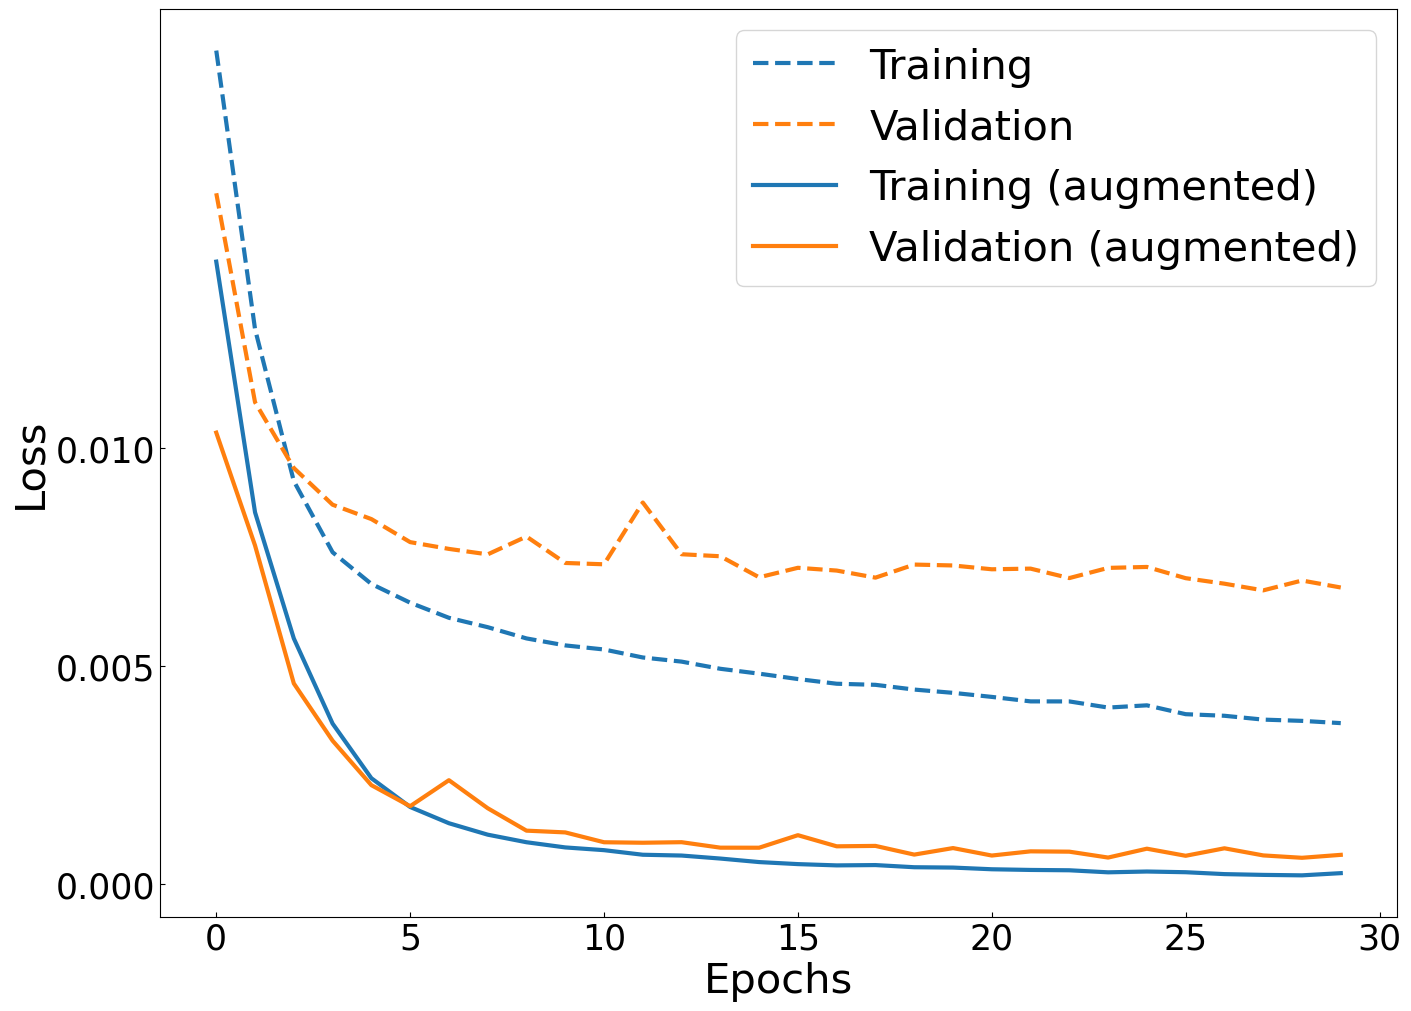

In [15]:
fontsize=30
fig, ax = plt.subplots(figsize=(14, 10), constrained_layout=True)
ax.plot(train_losses, 'C0--', label="Training", linewidth=3)
ax.plot(val_losses, 'C1--', label="Validation", linewidth=3)
ax.plot(train_losses_augmented, 'C0', label="Training (augmented)", linewidth=3)
ax.plot(val_losses_augmented, 'C1', label="Validation (augmented)", linewidth=3)
ax.set_xlabel("Epochs", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize-5, direction="in")
ax.set_yticks(np.linspace(0.00, 0.01 ,3))
ax.set_ylabel("Loss", fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize-5, direction="in")
ax.legend(fontsize=fontsize)
#plt.savefig("cube_loss.png", dpi=300)